In [1]:
import pandas as pd
from IPython.display import display, HTML

def make_price_numeric(txt):
    return txt[1:]

listing_df = pd.read_csv("listings.csv")
listing_df['price_num'] = listing_df.price[listing_df.bedrooms == 2].apply(lambda x: make_price_numeric(x))
listing_df.groupby('neighbourhood_group_cleansed')['price_num'].describe()


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,count,unique,top,freq
neighbourhood_group_cleansed,,,,
Bronx,94,49,100.00,8
Brooklyn,2915,265,150.00,221
Manhattan,2870,379,250.00,183
Queens,562,136,150.00,40
Staten Island,56,39,85.00,5


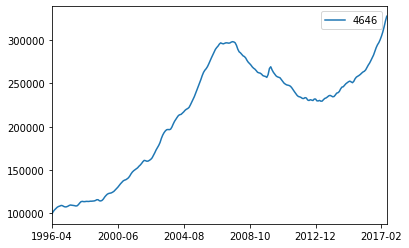

             4646
2017-02  304700.0
2017-03  309500.0
2017-04  315400.0
2017-05  322100.0
2017-06  327700.0
255


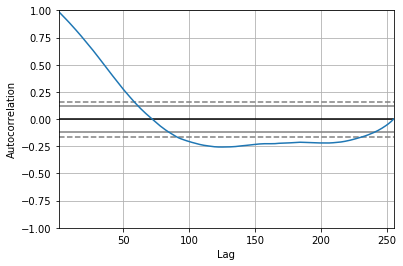

Size is 168
Value in train is 262900.0
Test MSE: 525970.110


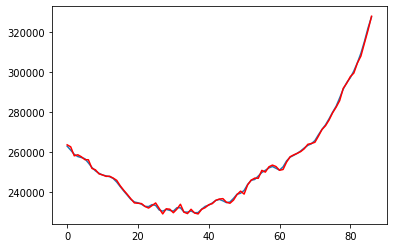

array([423534.16])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
zillow_df = pd.read_csv("Zip_Zhvi_2bedroom.csv")
zillow_ts = zillow_df[zillow_df.RegionName == 10303]
zillow_ts = zillow_ts.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
zillow_ts = zillow_ts.transpose()

zillow_ts.plot()
plt.show()

print(zillow_ts.tail())
print(len(zillow_ts))

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(zillow_ts)
plt.show()

prices = zillow_ts.iloc[:,0].values
size = int(len(prices) * 0.66)
print('Size is {}'.format(size))
print('Value in train is {}'.format(prices[size]))
train, test = prices[0: size], prices[size: len(prices)]
history = [x for x in train]
predictions = list()

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    output
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

model_fit.summary()
prediction = model_fit.predict(start=169, end=286, typ='levels')
prediction[-1:].round(2)
